In [1]:
import numpy as np
import pandas as pd
import potential1D as pot
import system1D 
import conveyorBelt as cvb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colorbar
%matplotlib inline

In [4]:
integrator='sd'
sys=[system1D.system1D(lam=0.0, potential=pot.pertHarmonicOsc1D(fc=5.0, alpha=0.0, gamma=5.0), integrator=integrator), 
     system1D.system1D(lam=1.0, potential=pot.pertHarmonicOsc1D(fc=5.0, alpha=0.0, gamma=5.0), integrator=integrator)]


In [ ]:
traj=[]
for s in sys:
    t = []
    s.pos=0.0
    for i in range(1000000):
        t.append(s.propagate())
    t=pd.DataFrame(t, columns=['Position', 'Temperature', 'Velocity', 'E_kin', 'E_pot', 'E_tot', 'Lambda', 'DHdlam'])
    traj.append(t)

traj[0].head()

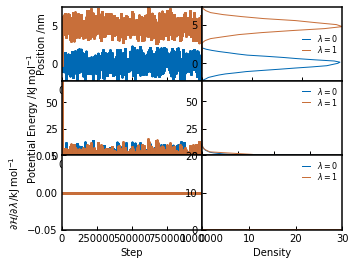

In [16]:
%matplotlib inline
fig, ax=plt.subplots(3, 2)
labels=['Position /nm', 'Potential Energy /$\mathrm{kJ}\, \mathrm{mol}^{-1}$', '$ \partial \mathcal{H} \
/ \partial \lambda  \, / \mathrm{kJ} \, \mathrm{mol}^{-1}$']
for s in range(2):
    hist=[]
    for i, j in enumerate(['Position', 'E_pot', 'DHdlam']):
        hist.append(np.histogram(traj[s][j], bins=30, density=1))
        ax[i,0].plot(traj[s].index, traj[s][j],'.', label='$\lambda={:d}$'.format(s))
        ax[i,0].set_ylabel(labels[i])
        ax[i,1].plot(hist[i][0], hist[i][1][:-1]+(hist[i][1][1]-hist[i][1][0])/2.0,label='$\lambda={:d}$'.format(s))
        ax[i,1].legend()
ax[2,0].set_xlabel('Step')
ax[2,1].set_xlabel('Density')
ax[2,1].set_ylim(0,20)
ax[2,1].legend()